# Obesity risk factors classification

In [31]:
# import the nescessary libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import naive_bayes
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [32]:
#importing the dataset
file_path = 'ObesityDataSet_raw_and_data_sinthetic.csv'
data = pd.read_csv(file_path)
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [33]:
#checking for the data size and types
print(data.dtypes)
print(data.shape)

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object
(2111, 17)


### Data cleaning and processing

In [34]:
# checking for the null value in dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

since there is no null value we can continue to data processing

In [35]:
# radomizing the order in dataset
data = data.sample(frac=1, random_state=45).reset_index(drop=True)

In [36]:
# seperating data into classes and variables
attributes = data.iloc[:,: -1]
labels = data.iloc[:, -1]
attributes.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,37.631769,1.513202,75.410647,yes,yes,2.0,2.582591,Sometimes,no,1.535134,no,1.884520,0.000000,Sometimes,Automobile
1,Female,25.897815,1.664463,102.781971,yes,yes,3.0,3.000000,Sometimes,no,1.068493,no,0.112122,1.000000,Sometimes,Public_Transportation
2,Female,18.000000,1.620000,68.000000,no,no,2.0,1.000000,Sometimes,no,1.000000,no,0.000000,2.000000,no,Public_Transportation
3,Male,18.014333,1.751029,80.000000,yes,yes,2.0,2.805436,Sometimes,no,2.122884,no,0.045651,0.017225,Frequently,Public_Transportation
4,Male,23.083621,1.848553,121.421121,yes,yes,3.0,2.567567,Sometimes,no,2.011023,no,0.916478,0.000000,Sometimes,Public_Transportation


In [37]:
labels_encoding = {'Insufficient_Weight': 0,
                   'Normal_Weight': 1,
                   'Overweight_Level_I': 2,
                   'Overweight_Level_II': 3,
                   'Obesity_Type_I': 4,
                   'Obesity_Type_II': 5,
                   'Obesity_Type_III': 6}
labels = labels.replace(labels_encoding)
labels.head()

0    4
1    6
2    2
3    2
4    5
Name: NObeyesdad, dtype: int64

In [38]:
# since height and weight is a function of body type, we will drop these two variables to focus on the other risk factors
attributes = attributes.drop('Height', axis=1)
attributes = attributes.drop('Weight', axis=1)
attributes.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,37.631769,yes,yes,2.0,2.582591,Sometimes,no,1.535134,no,1.884520,0.000000,Sometimes,Automobile
1,Female,25.897815,yes,yes,3.0,3.000000,Sometimes,no,1.068493,no,0.112122,1.000000,Sometimes,Public_Transportation
2,Female,18.000000,no,no,2.0,1.000000,Sometimes,no,1.000000,no,0.000000,2.000000,no,Public_Transportation
3,Male,18.014333,yes,yes,2.0,2.805436,Sometimes,no,2.122884,no,0.045651,0.017225,Frequently,Public_Transportation
4,Male,23.083621,yes,yes,3.0,2.567567,Sometimes,no,2.011023,no,0.916478,0.000000,Sometimes,Public_Transportation


In [39]:
# encoding variable into binomial and numerical value
var_encoding = {'Gender':                         {'Male': 0, 'Female': 1},
                'family_history_with_overweight': {'yes': 1, 'no': 0},
                'FAVC':                           {'yes': 1, 'no': 0},
                'CAEC':                           {'no': 0, 'Sometimes': 1,
                                                  'Frequently': 2, 'Always': 3},
                'SMOKE':                          {'yes': 1, 'no': 0},
                'SCC':                            {'yes': 1, 'no': 0},
                'CALC':                           {'no': 0, 'Sometimes': 1,
                                                  'Frequently': 2, 'Always': 3}}
attributes = attributes.replace(var_encoding)
attributes.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,37.631769,1,1,2.0,2.582591,1,0,1.535134,0,1.884520,0.000000,1,Automobile
1,1,25.897815,1,1,3.0,3.000000,1,0,1.068493,0,0.112122,1.000000,1,Public_Transportation
2,1,18.000000,0,0,2.0,1.000000,1,0,1.000000,0,0.000000,2.000000,0,Public_Transportation
3,0,18.014333,1,1,2.0,2.805436,1,0,2.122884,0,0.045651,0.017225,2,Public_Transportation
4,0,23.083621,1,1,3.0,2.567567,1,0,2.011023,0,0.916478,0.000000,1,Public_Transportation


In [40]:
# for MTRANS, we will use one-hot encoding method since their is no linear relationship between each variables
mtrans = pd.get_dummies(attributes['MTRANS'])
mtrans.head()

,Automobile,Bike,Motorbike,Public_Transportation,Walking
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [41]:
# combining the encoded MTRANS with the rest of the variables
attributes = attributes.drop('MTRANS', axis=1)
attributes = pd.concat([attributes, mtrans], axis=1)
attributes.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking
0,1,37.631769,1,1,2.0,2.582591,1,0,1.535134,0,1.884520,0.000000,1,1,0,0,0,0
1,1,25.897815,1,1,3.0,3.000000,1,0,1.068493,0,0.112122,1.000000,1,0,0,0,1,0
2,1,18.000000,0,0,2.0,1.000000,1,0,1.000000,0,0.000000,2.000000,0,0,0,0,1,0
3,0,18.014333,1,1,2.0,2.805436,1,0,2.122884,0,0.045651,0.017225,2,0,0,0,1,0
4,0,23.083621,1,1,3.0,2.567567,1,0,2.011023,0,0.916478,0.000000,1,0,0,0,1,0


## Virtualisation and Analysis

Text(0.5, 1.0, 'Distribution of neutritional status')

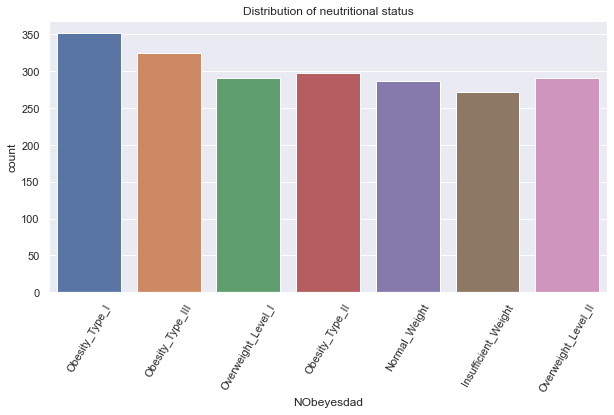

In [74]:
# vitualisation of labels
plt.figure(figsize=(10,5))
ax = sns.countplot(data=data, x='NObeyesdad')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
plt.title('Distribution of neutritional status')

In [42]:
# finding corelation between the attributes and labels
new_data = pd.concat([attributes,labels], axis=1)
new_data.corr()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
Gender,1.000000,-0.048394,-0.102512,-0.064934,0.274505,-0.067600,0.091543,-0.044698,-0.107930,0.102633,-0.189607,-0.017269,0.007616,-0.137560,-0.057001,-0.045203,0.160184,-0.039317,0.031464
Age,-0.048394,1.000000,0.205725,0.063902,0.016291,-0.043944,-0.083739,0.091987,-0.045304,-0.116283,-0.144938,-0.296931,0.044487,0.604683,0.003652,0.020286,-0.554448,-0.063064,0.282913
family_history_with_overweight,-0.102512,0.205725,1.000000,0.208036,0.040372,0.071370,-0.169787,0.017385,0.147437,-0.185422,-0.056673,0.022943,-0.036676,0.099327,-0.015435,-0.051011,-0.058927,-0.067076,0.505148
FAVC,-0.064934,0.063902,0.208036,1.000000,-0.027283,-0.007000,-0.150068,-0.050660,0.009719,-0.190658,-0.107995,0.068417,0.089520,0.057597,-0.082005,-0.035401,0.028539,-0.179473,0.247793
FCVC,0.274505,0.016291,0.040372,-0.027283,1.000000,0.042216,0.054670,0.014320,0.068461,0.071852,0.019939,-0.101135,0.060781,-0.061049,-0.029843,-0.007512,0.057966,0.013991,0.227759
NCP,-0.067600,-0.043944,0.071370,-0.007000,0.042216,1.000000,0.097801,0.007811,0.057088,-0.015624,0.129504,0.036326,0.071747,0.053424,0.023312,0.003875,-0.056849,0.006502,0.026690
CAEC,0.091543,-0.083739,-0.169787,-0.150068,0.054670,0.097801,1.000000,0.055282,-0.144995,0.109179,0.030110,0.048567,-0.047540,-0.044925,0.017857,0.076583,-0.003013,0.082571,-0.329350
SMOKE,-0.044698,0.091987,0.017385,-0.050660,0.014320,0.007811,0.055282,1.000000,-0.031995,0.047731,0.011216,0.017613,0.082471,0.011873,-0.008416,0.035496,-0.022409,0.017184,0.003442
CH2O,-0.107930,-0.045304,0.147437,0.009719,0.068461,0.057088,-0.144995,-0.031995,1.000000,0.008036,0.167236,0.011965,0.091386,-0.046237,0.026139,-0.000946,0.037504,0.008307,0.133008
SCC,0.102633,-0.116283,-0.185422,-0.190658,0.071852,-0.015624,0.109179,0.047731,0.008036,1.000000,0.074221,-0.010928,0.003463,-0.042965,0.026960,0.047362,0.011255,0.048860,-0.194508


Text(0.5, 1.0, 'family_history_with_overweight')

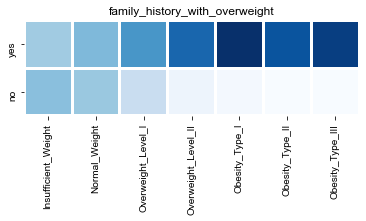

In [63]:
# virtualising the corelation between family history with_overweight and the labels
order = ['Insufficient_Weight',
         'Normal_Weight',
         'Overweight_Level_I',
         'Overweight_Level_II',
         'Obesity_Type_I',
         'Obesity_Type_II',
         'Obesity_Type_III']
y_n = ['yes', 'no']
history = pd.DataFrame(index=y_n, columns=order)
for i in y_n:
    for j in order:
        n = len(data.loc[(data['family_history_with_overweight'] == i) & (data['NObeyesdad'] == j)])
        history.loc[i,j] = n
history = history.astype('int')
sns.heatmap(history, cmap='Blues', linewidths=2, cbar=False, square=True)
sns.set(rc={'figure.figsize':(5,5)})
plt.title('family_history_with_overweight')

Text(0.5, 1.0, 'CAEC')

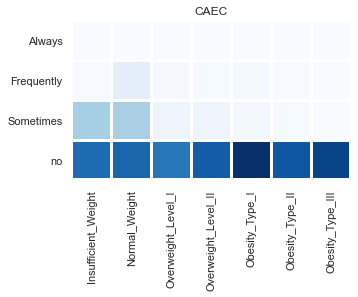

In [64]:
# virtualising the corelation between CAEC and the labels
freq = ['Always', 'Frequently', 'Sometimes', 'no']
history = pd.DataFrame(index=freq, columns=order)
for i in freq:
    for j in order:
        n = len(data.loc[(data['CAEC'] < i) & (data['NObeyesdad'] == j)])
        history.loc[i,j] = n
history = history.astype('int')
sns.heatmap(history, cmap='Blues', linewidths=2, cbar=False, square=True)
plt.title('CAEC')

## Classification

In [100]:
# creating a train test split
X_train, X_test, y_train, y_test = train_test_split(attributes, labels, test_size=0.2, random_state=0, stratify=labels)

### Naive Bayes classifier

C:\Users\Ice\anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\Users\Ice\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ice\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


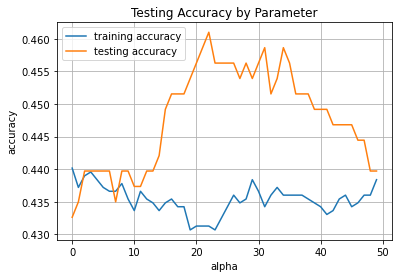

In [44]:
# mapping out the effect of parameters to accuracy
training_accuracy = []
testing_accuracy = []
alphas = range(0,50)
for i in alphas:
    classifier = naive_bayes.MultinomialNB(alpha=i, fit_prior=False)
    classifier.fit(X_train, y_train)
    training_accuracy.append(accuracy_score(y_train,
                                            classifier.predict(X_train)))
    testing_accuracy.append(accuracy_score(y_test,
                                           classifier.predict(X_test)))
plt.figure()
sns.lineplot(alphas, training_accuracy, label='training accuracy')
sns.lineplot(alphas, testing_accuracy, 
             label='testing accuracy')
plt.title('Testing Accuracy by Parameter')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

In [45]:
#creating a classifier
nb_cla = naive_bayes.MultinomialNB(alpha=22, fit_prior=False)

In [46]:
#training the model
nb_cla.fit(X_train, y_train)

MultinomialNB(alpha=22, fit_prior=False)

In [103]:
time nb_cla.fit(X_train, y_train)

Wall time: 4.01 ms


MultinomialNB(alpha=22, fit_prior=False)

In [48]:
# testing for in-sample and off-sample accuracy
y_train_nb = nb_cla.predict(X_train)
y_test_nb = nb_cla.predict(X_test)
nb_train_acc = accuracy_score(y_train, y_train_nb)
nb_test_acc = accuracy_score(y_test, y_test_nb)
print('The training accuracy is:', nb_train_acc)
print('The testing accuracy is:', nb_test_acc)

The training accuracy is: 0.4312796208530806
The testing accuracy is: 0.46099290780141844


In [50]:
print(metrics.classification_report(y_test, y_test_nb, digits=3))

              precision    recall  f1-score   support

           0      0.388     0.352     0.369        54
           1      0.552     0.276     0.368        58
           2      0.750     0.155     0.257        58
           3      0.276     0.138     0.184        58
           4      0.571     0.286     0.381        70
           5      0.415     0.983     0.584        60
           6      0.504     0.985     0.667        65

    accuracy                          0.461       423
   macro avg      0.494     0.453     0.401       423
weighted avg      0.497     0.461     0.406       423



Text(91.68, 0.5, 'predicted label')

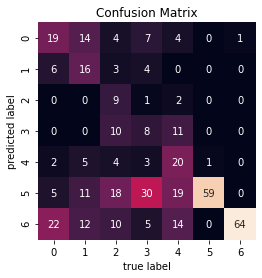

In [51]:
# creating a confusion matrix
nb_matrix = confusion_matrix(y_test, y_test_nb)
sns.heatmap(nb_matrix.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=nb_cla.classes_, yticklabels=nb_cla.classes_)
plt.title('Confusion Matrix')
plt.xlabel('true label')
plt.ylabel('predicted label')

### Neural Network Model 1

In [22]:
# prepair the dataset
X = X_train.values
X

array([[ 1.      , 20.323767,  1.      , ...,  0.      ,  1.      ,
         0.      ],
       [ 1.      , 39.129291,  1.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 1.      , 28.167799,  1.      , ...,  0.      ,  0.      ,
         0.      ],
       ...,
       [ 0.      , 20.406066,  1.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 1.      , 26.      ,  1.      , ...,  0.      ,  1.      ,
         0.      ],
       [ 0.      , 30.493946,  1.      , ...,  0.      ,  0.      ,
         0.      ]])

In [23]:
# prepair the dataset
y = pd.get_dummies(y_train).values
y

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)

In [24]:
# seperate 30% of the dataset for validation
X_valid, X_train_nn = X[:506], X[506:]
y_valid, y_train_nn = y[:506], y[506:]

In [25]:
# define a function to create a model
keras.backend.clear_session()
np.random.seed(10)
tf.random.set_seed(10)
def create_model(optimizer, af1, af2):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(18, input_dim=18, activation=af1))
    model.add(keras.layers.Dense(18, activation=af2))
    model.add(keras.layers.Dense(7, activation='softmax'))
    model.compile(
        loss='categorical_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy'])
    return model

# create model
model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, verbose=0)
af1 = ['sigmoid', 'relu', 'tanh']
af2 = ['sigmoid', 'relu', 'tanh']
optimizer = ['SGD', 'adam']
batch_size = [16, 32, 64]
epochs = [300, 400, 500]
param_grid = dict(optimizer=optimizer,
                  batch_size=batch_size,
                  epochs=epochs,
                  af1=af1,
                  af2=af2)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_nn, y_train_nn)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.712352 using {'af1': 'tanh', 'af2': 'tanh', 'batch_size': 16, 'epochs': 400, 'optimizer': 'Adam'}


Epoch 1/400
37/37 - 0s - loss: 2.1536 - accuracy: 0.1591 - val_loss: 1.9541 - val_accuracy: 0.1897
Epoch 2/400
37/37 - 0s - loss: 1.9013 - accuracy: 0.2293 - val_loss: 1.8579 - val_accuracy: 0.2688
Epoch 3/400
37/37 - 0s - loss: 1.8317 - accuracy: 0.2919 - val_loss: 1.8090 - val_accuracy: 0.3004
Epoch 4/400
37/37 - 0s - loss: 1.7683 - accuracy: 0.3435 - val_loss: 1.7494 - val_accuracy: 0.3221
Epoch 5/400
37/37 - 0s - loss: 1.6986 - accuracy: 0.3528 - val_loss: 1.6860 - val_accuracy: 0.3874
Epoch 6/400
37/37 - 0s - loss: 1.6236 - accuracy: 0.3773 - val_loss: 1.6174 - val_accuracy: 0.3854
Epoch 7/400
37/37 - 0s - loss: 1.5520 - accuracy: 0.4213 - val_loss: 1.5488 - val_accuracy: 0.4170
Epoch 8/400
37/37 - 0s - loss: 1.4817 - accuracy: 0.4645 - val_loss: 1.4963 - val_accuracy: 0.4170
Epoch 9/400
37/37 - 0s - loss: 1.4319 - accuracy: 0.4907 - val_loss: 1.4441 - val_accuracy: 0.4763
Epoch 10/400
37/37 - 0s - loss: 1.3844 - accuracy: 0.4865 - val_loss: 1.4134 - val_accuracy: 0.4842
Epoch 11/

Epoch 84/400
37/37 - 0s - loss: 0.8161 - accuracy: 0.7039 - val_loss: 1.0346 - val_accuracy: 0.6146
Epoch 85/400
37/37 - 0s - loss: 0.8161 - accuracy: 0.7081 - val_loss: 1.0212 - val_accuracy: 0.6364
Epoch 86/400
37/37 - 0s - loss: 0.8089 - accuracy: 0.6963 - val_loss: 1.0047 - val_accuracy: 0.6423
Epoch 87/400
37/37 - 0s - loss: 0.8135 - accuracy: 0.6937 - val_loss: 1.0403 - val_accuracy: 0.6126
Epoch 88/400
37/37 - 0s - loss: 0.7956 - accuracy: 0.7124 - val_loss: 1.0168 - val_accuracy: 0.6542
Epoch 89/400
37/37 - 0s - loss: 0.8032 - accuracy: 0.7064 - val_loss: 1.0072 - val_accuracy: 0.6324
Epoch 90/400
37/37 - 0s - loss: 0.7963 - accuracy: 0.7039 - val_loss: 1.0079 - val_accuracy: 0.6522
Epoch 91/400
37/37 - 0s - loss: 0.7942 - accuracy: 0.7098 - val_loss: 1.0055 - val_accuracy: 0.6561
Epoch 92/400
37/37 - 0s - loss: 0.7893 - accuracy: 0.7107 - val_loss: 1.0071 - val_accuracy: 0.6522
Epoch 93/400
37/37 - 0s - loss: 0.7896 - accuracy: 0.7124 - val_loss: 1.0041 - val_accuracy: 0.6522


Epoch 166/400
37/37 - 0s - loss: 0.6452 - accuracy: 0.7724 - val_loss: 0.9688 - val_accuracy: 0.6680
Epoch 167/400
37/37 - 0s - loss: 0.6452 - accuracy: 0.7716 - val_loss: 0.9740 - val_accuracy: 0.6759
Epoch 168/400
37/37 - 0s - loss: 0.6389 - accuracy: 0.7716 - val_loss: 0.9600 - val_accuracy: 0.6897
Epoch 169/400
37/37 - 0s - loss: 0.6430 - accuracy: 0.7809 - val_loss: 0.9849 - val_accuracy: 0.6680
Epoch 170/400
37/37 - 0s - loss: 0.6417 - accuracy: 0.7699 - val_loss: 0.9701 - val_accuracy: 0.6759
Epoch 171/400
37/37 - 0s - loss: 0.6365 - accuracy: 0.7834 - val_loss: 0.9590 - val_accuracy: 0.6798
Epoch 172/400
37/37 - 0s - loss: 0.6339 - accuracy: 0.7741 - val_loss: 0.9697 - val_accuracy: 0.6877
Epoch 173/400
37/37 - 0s - loss: 0.6424 - accuracy: 0.7750 - val_loss: 0.9686 - val_accuracy: 0.6818
Epoch 174/400
37/37 - 0s - loss: 0.6347 - accuracy: 0.7741 - val_loss: 0.9725 - val_accuracy: 0.6739
Epoch 175/400
37/37 - 0s - loss: 0.6295 - accuracy: 0.7851 - val_loss: 0.9652 - val_accurac

37/37 - 0s - loss: 0.5413 - accuracy: 0.8274 - val_loss: 0.9751 - val_accuracy: 0.6976
Epoch 248/400
37/37 - 0s - loss: 0.5471 - accuracy: 0.8240 - val_loss: 0.9839 - val_accuracy: 0.6838
Epoch 249/400
37/37 - 0s - loss: 0.5498 - accuracy: 0.8096 - val_loss: 0.9900 - val_accuracy: 0.6976
Epoch 250/400
37/37 - 0s - loss: 0.5396 - accuracy: 0.8308 - val_loss: 0.9635 - val_accuracy: 0.7075
Epoch 251/400
37/37 - 0s - loss: 0.5391 - accuracy: 0.8223 - val_loss: 0.9743 - val_accuracy: 0.7036
Epoch 252/400
37/37 - 0s - loss: 0.5363 - accuracy: 0.8240 - val_loss: 0.9677 - val_accuracy: 0.6976
Epoch 253/400
37/37 - 0s - loss: 0.5413 - accuracy: 0.8198 - val_loss: 0.9840 - val_accuracy: 0.7016
Epoch 254/400
37/37 - 0s - loss: 0.5353 - accuracy: 0.8223 - val_loss: 0.9831 - val_accuracy: 0.6818
Epoch 255/400
37/37 - 0s - loss: 0.5388 - accuracy: 0.8215 - val_loss: 0.9771 - val_accuracy: 0.7075
Epoch 256/400
37/37 - 0s - loss: 0.5343 - accuracy: 0.8257 - val_loss: 0.9698 - val_accuracy: 0.6957
Epoc

Epoch 329/400
37/37 - 0s - loss: 0.4695 - accuracy: 0.8418 - val_loss: 0.9856 - val_accuracy: 0.7095
Epoch 330/400
37/37 - 0s - loss: 0.4725 - accuracy: 0.8452 - val_loss: 0.9863 - val_accuracy: 0.7075
Epoch 331/400
37/37 - 0s - loss: 0.4713 - accuracy: 0.8435 - val_loss: 0.9947 - val_accuracy: 0.7036
Epoch 332/400
37/37 - 0s - loss: 0.4733 - accuracy: 0.8443 - val_loss: 0.9878 - val_accuracy: 0.7115
Epoch 333/400
37/37 - 0s - loss: 0.4707 - accuracy: 0.8452 - val_loss: 0.9973 - val_accuracy: 0.7095
Epoch 334/400
37/37 - 0s - loss: 0.4672 - accuracy: 0.8494 - val_loss: 1.0059 - val_accuracy: 0.7036
Epoch 335/400
37/37 - 0s - loss: 0.4689 - accuracy: 0.8486 - val_loss: 0.9909 - val_accuracy: 0.7095
Epoch 336/400
37/37 - 0s - loss: 0.4651 - accuracy: 0.8528 - val_loss: 0.9919 - val_accuracy: 0.6996
Epoch 337/400
37/37 - 0s - loss: 0.4615 - accuracy: 0.8477 - val_loss: 1.0107 - val_accuracy: 0.7055
Epoch 338/400
37/37 - 0s - loss: 0.4647 - accuracy: 0.8435 - val_loss: 1.0152 - val_accurac

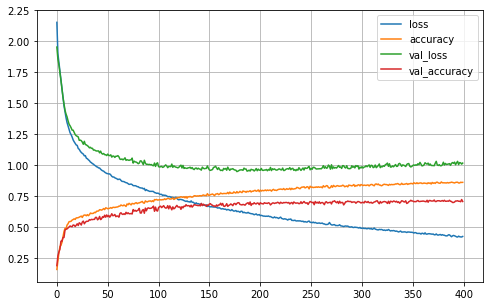

In [25]:
# training the neural network model
keras.backend.clear_session()
np.random.seed(10)
tf.random.set_seed(10)
model = keras.models.Sequential()
model.add(keras.layers.Dense(18, input_dim=18, activation='tanh'))
model.add(keras.layers.Dense(18, activation='tanh'))
model.add(keras.layers.Dense(7, activation='softmax'))
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])
history = model.fit(X_train_nn, y_train_nn, 
                    validation_data=(X_valid, y_valid),
                    epochs=400, batch_size=32, verbose=2)

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

In [27]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 18)                342       
_________________________________________________________________
dense_1 (Dense)              (None, 18)                342       
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 133       
Total params: 817
Trainable params: 817
Non-trainable params: 0
_________________________________________________________________


In [111]:
time model.fit(X_train_nn, y_train_nn, epochs=400, batch_size=32, verbose=0)

Wall time: 8.56 s


In [52]:
# predicting the testing dataset
y_nn = model.predict_classes(X_test)

In [54]:
# evaluating the model
print(metrics.classification_report(y_test, y_nn, digits=3))

              precision    recall  f1-score   support

           0      0.778     0.778     0.778        54
           1      0.509     0.466     0.486        58
           2      0.627     0.638     0.632        58
           3      0.739     0.586     0.654        58
           4      0.667     0.657     0.662        70
           5      0.733     0.917     0.815        60
           6      0.970     1.000     0.985        65

    accuracy                          0.723       423
   macro avg      0.718     0.720     0.716       423
weighted avg      0.720     0.723     0.719       423



Text(91.68, 0.5, 'predicted label')

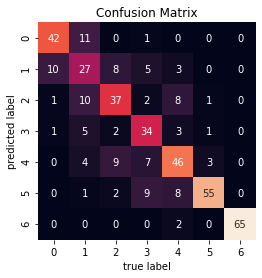

In [55]:
# creating a confusion matrix
nb_matrix = confusion_matrix(y_test, y_nn)
sns.heatmap(nb_matrix.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=nb_cla.classes_, yticklabels=nb_cla.classes_)
plt.title('Confusion Matrix')
plt.xlabel('true label')
plt.ylabel('predicted label')

### Neural Network Model 2

In [101]:
# droping variables with correlation lower than 5%
X_train = X_train.drop('Gender', axis=1)
X_train = X_train.drop('NCP', axis=1)
X_train = X_train.drop('SMOKE', axis=1)
X_test = X_test.drop('Gender', axis=1)
X_test = X_test.drop('NCP', axis=1)
X_test = X_test.drop('SMOKE', axis=1)

In [79]:
# prepair the dataset
X = X_train.values
X

array([[20.323767,  1.      ,  1.      , ...,  0.      ,  1.      ,
         0.      ],
       [39.129291,  1.      ,  1.      , ...,  0.      ,  0.      ,
         0.      ],
       [28.167799,  1.      ,  1.      , ...,  0.      ,  0.      ,
         0.      ],
       ...,
       [20.406066,  1.      ,  1.      , ...,  0.      ,  0.      ,
         0.      ],
       [26.      ,  1.      ,  1.      , ...,  0.      ,  1.      ,
         0.      ],
       [30.493946,  1.      ,  1.      , ...,  0.      ,  0.      ,
         0.      ]])

In [80]:
# prepair the dataset
y = pd.get_dummies(y_train).values
y

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)

In [81]:
# seperate 30% of the dataset for validation
X_valid, X_train_nn = X[:506], X[506:]
y_valid, y_train_nn = y[:506], y[506:]

In [82]:
# define a function to create a model
keras.backend.clear_session()
np.random.seed(10)
tf.random.set_seed(10)
def create_model(optimizer, af1, af2):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(15, input_dim=15, activation=af1))
    model.add(keras.layers.Dense(15, activation=af2))
    model.add(keras.layers.Dense(7, activation='softmax'))
    model.compile(
        loss='categorical_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy'])
    return model

# create model
model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, verbose=0)
af1 = ['sigmoid', 'relu', 'tanh']
af2 = ['sigmoid', 'relu', 'tanh']
optimizer = ['SGD', 'adam']
batch_size = [16, 32, 64]
epochs = [300, 400, 500]
param_grid = dict(optimizer=optimizer,
                  batch_size=batch_size,
                  epochs=epochs,
                  af1=af1,
                  af2=af2)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_nn, y_train_nn)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.661591 using {'af1': 'tanh', 'af2': 'relu', 'batch_size': 16, 'epochs': 400, 'optimizer': 'Adam'}


Epoch 1/400
74/74 - 0s - loss: 2.2454 - accuracy: 0.1404 - val_loss: 1.9638 - val_accuracy: 0.1304
Epoch 2/400
74/74 - 0s - loss: 1.9380 - accuracy: 0.1396 - val_loss: 1.9117 - val_accuracy: 0.1561
Epoch 3/400
74/74 - 0s - loss: 1.8833 - accuracy: 0.2115 - val_loss: 1.8696 - val_accuracy: 0.2866
Epoch 4/400
74/74 - 0s - loss: 1.8424 - accuracy: 0.3088 - val_loss: 1.8261 - val_accuracy: 0.3202
Epoch 5/400
74/74 - 0s - loss: 1.7968 - accuracy: 0.3291 - val_loss: 1.7780 - val_accuracy: 0.3320
Epoch 6/400
74/74 - 0s - loss: 1.7405 - accuracy: 0.3325 - val_loss: 1.7231 - val_accuracy: 0.3458
Epoch 7/400
74/74 - 0s - loss: 1.6685 - accuracy: 0.3350 - val_loss: 1.6320 - val_accuracy: 0.3360
Epoch 8/400
74/74 - 0s - loss: 1.5818 - accuracy: 0.3553 - val_loss: 1.5743 - val_accuracy: 0.3755
Epoch 9/400
74/74 - 0s - loss: 1.5180 - accuracy: 0.3723 - val_loss: 1.5183 - val_accuracy: 0.3794
Epoch 10/400
74/74 - 0s - loss: 1.4652 - accuracy: 0.3917 - val_loss: 1.4830 - val_accuracy: 0.4209
Epoch 11/

74/74 - 0s - loss: 0.9599 - accuracy: 0.6540 - val_loss: 1.1804 - val_accuracy: 0.5949
Epoch 84/400
74/74 - 0s - loss: 0.9490 - accuracy: 0.6667 - val_loss: 1.1562 - val_accuracy: 0.6166
Epoch 85/400
74/74 - 0s - loss: 0.9471 - accuracy: 0.6650 - val_loss: 1.1831 - val_accuracy: 0.5870
Epoch 86/400
74/74 - 0s - loss: 0.9502 - accuracy: 0.6616 - val_loss: 1.1581 - val_accuracy: 0.6028
Epoch 87/400
74/74 - 0s - loss: 0.9464 - accuracy: 0.6692 - val_loss: 1.1704 - val_accuracy: 0.6126
Epoch 88/400
74/74 - 0s - loss: 0.9424 - accuracy: 0.6684 - val_loss: 1.1655 - val_accuracy: 0.6225
Epoch 89/400
74/74 - 0s - loss: 0.9388 - accuracy: 0.6734 - val_loss: 1.1501 - val_accuracy: 0.6067
Epoch 90/400
74/74 - 0s - loss: 0.9354 - accuracy: 0.6684 - val_loss: 1.1555 - val_accuracy: 0.6008
Epoch 91/400
74/74 - 0s - loss: 0.9348 - accuracy: 0.6684 - val_loss: 1.1531 - val_accuracy: 0.5929
Epoch 92/400
74/74 - 0s - loss: 0.9255 - accuracy: 0.6709 - val_loss: 1.1510 - val_accuracy: 0.6008
Epoch 93/400


Epoch 165/400
74/74 - 0s - loss: 0.7944 - accuracy: 0.7208 - val_loss: 1.1129 - val_accuracy: 0.6482
Epoch 166/400
74/74 - 0s - loss: 0.7946 - accuracy: 0.7318 - val_loss: 1.1196 - val_accuracy: 0.6344
Epoch 167/400
74/74 - 0s - loss: 0.8067 - accuracy: 0.7250 - val_loss: 1.1342 - val_accuracy: 0.6383
Epoch 168/400
74/74 - 0s - loss: 0.7964 - accuracy: 0.7267 - val_loss: 1.1066 - val_accuracy: 0.6462
Epoch 169/400
74/74 - 0s - loss: 0.7902 - accuracy: 0.7293 - val_loss: 1.1124 - val_accuracy: 0.6443
Epoch 170/400
74/74 - 0s - loss: 0.8002 - accuracy: 0.7250 - val_loss: 1.1201 - val_accuracy: 0.6462
Epoch 171/400
74/74 - 0s - loss: 0.7979 - accuracy: 0.7250 - val_loss: 1.1101 - val_accuracy: 0.6561
Epoch 172/400
74/74 - 0s - loss: 0.7871 - accuracy: 0.7420 - val_loss: 1.1105 - val_accuracy: 0.6561
Epoch 173/400
74/74 - 0s - loss: 0.7936 - accuracy: 0.7250 - val_loss: 1.1122 - val_accuracy: 0.6581
Epoch 174/400
74/74 - 0s - loss: 0.7865 - accuracy: 0.7284 - val_loss: 1.1019 - val_accurac

74/74 - 0s - loss: 0.7293 - accuracy: 0.7453 - val_loss: 1.1585 - val_accuracy: 0.6601
Epoch 247/400
74/74 - 0s - loss: 0.7340 - accuracy: 0.7428 - val_loss: 1.1487 - val_accuracy: 0.6581
Epoch 248/400
74/74 - 0s - loss: 0.7303 - accuracy: 0.7462 - val_loss: 1.1652 - val_accuracy: 0.6502
Epoch 249/400
74/74 - 0s - loss: 0.7200 - accuracy: 0.7487 - val_loss: 1.1458 - val_accuracy: 0.6581
Epoch 250/400
74/74 - 0s - loss: 0.7181 - accuracy: 0.7555 - val_loss: 1.1500 - val_accuracy: 0.6581
Epoch 251/400
74/74 - 0s - loss: 0.7194 - accuracy: 0.7580 - val_loss: 1.1496 - val_accuracy: 0.6522
Epoch 252/400
74/74 - 0s - loss: 0.7240 - accuracy: 0.7521 - val_loss: 1.1436 - val_accuracy: 0.6640
Epoch 253/400
74/74 - 0s - loss: 0.7178 - accuracy: 0.7547 - val_loss: 1.1680 - val_accuracy: 0.6423
Epoch 254/400
74/74 - 0s - loss: 0.7163 - accuracy: 0.7555 - val_loss: 1.1446 - val_accuracy: 0.6581
Epoch 255/400
74/74 - 0s - loss: 0.7198 - accuracy: 0.7470 - val_loss: 1.1463 - val_accuracy: 0.6561
Epoc

Epoch 328/400
74/74 - 0s - loss: 0.6779 - accuracy: 0.7614 - val_loss: 1.2076 - val_accuracy: 0.6522
Epoch 329/400
74/74 - 0s - loss: 0.6743 - accuracy: 0.7750 - val_loss: 1.1914 - val_accuracy: 0.6719
Epoch 330/400
74/74 - 0s - loss: 0.6732 - accuracy: 0.7783 - val_loss: 1.2055 - val_accuracy: 0.6561
Epoch 331/400
74/74 - 0s - loss: 0.6690 - accuracy: 0.7860 - val_loss: 1.1909 - val_accuracy: 0.6680
Epoch 332/400
74/74 - 0s - loss: 0.6692 - accuracy: 0.7741 - val_loss: 1.2030 - val_accuracy: 0.6700
Epoch 333/400
74/74 - 0s - loss: 0.6700 - accuracy: 0.7682 - val_loss: 1.1981 - val_accuracy: 0.6700
Epoch 334/400
74/74 - 0s - loss: 0.6771 - accuracy: 0.7775 - val_loss: 1.1787 - val_accuracy: 0.6798
Epoch 335/400
74/74 - 0s - loss: 0.6655 - accuracy: 0.7851 - val_loss: 1.1985 - val_accuracy: 0.6561
Epoch 336/400
74/74 - 0s - loss: 0.6622 - accuracy: 0.7750 - val_loss: 1.1942 - val_accuracy: 0.6700
Epoch 337/400
74/74 - 0s - loss: 0.6734 - accuracy: 0.7741 - val_loss: 1.1972 - val_accurac

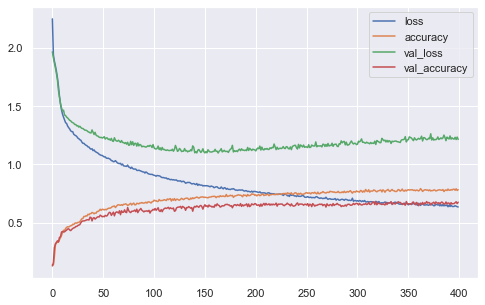

In [86]:
# training the neural network model
keras.backend.clear_session()
np.random.seed(10)
tf.random.set_seed(10)
model = keras.models.Sequential()
model.add(keras.layers.Dense(15, input_dim=15, activation='tanh'))
model.add(keras.layers.Dense(15, activation='relu'))
model.add(keras.layers.Dense(7, activation='softmax'))
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])
history = model.fit(X_train_nn, y_train_nn, 
                    validation_data=(X_valid, y_valid),
                    epochs=400, batch_size=16, verbose=2)

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

In [87]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 112       
Total params: 592
Trainable params: 592
Non-trainable params: 0
_________________________________________________________________


In [110]:
time model.fit(X_train_nn, y_train_nn, epochs=400, batch_size=16, verbose=0)

Wall time: 15.6 s


In [95]:
# predicting the testing dataset
y_nn = model.predict_classes(X_test)


In [97]:
# evaluating the model
print(metrics.classification_report(y_test, y_nn, digits=3))

              precision    recall  f1-score   support

           0      0.759     0.759     0.759        54
           1      0.660     0.534     0.590        58
           2      0.600     0.466     0.524        58
           3      0.508     0.517     0.513        58
           4      0.588     0.671     0.627        70
           5      0.694     0.833     0.758        60
           6      0.985     1.000     0.992        65

    accuracy                          0.688       423
   macro avg      0.685     0.683     0.680       423
weighted avg      0.686     0.688     0.684       423



Text(25.1, 0.5, 'predicted label')

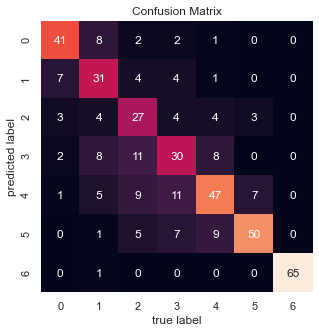

In [98]:
# creating a confusion matrix
nb_matrix = confusion_matrix(y_test, y_nn)
sns.heatmap(nb_matrix.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=nb_cla.classes_, yticklabels=nb_cla.classes_)
plt.title('Confusion Matrix')
plt.xlabel('true label')
plt.ylabel('predicted label')